In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error




In [2]:
df = pd.read_csv('data/stud.csv')
df.head(5)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df['Average_score']=round((df['math_score']+df['reading_score']+df['writing_score'])/3)

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [5]:
x=df.drop(columns=['Average_score'],axis=1)
y=df['Average_score']

In [6]:
x.shape

(1000, 8)

In [7]:
y.shape

(1000,)

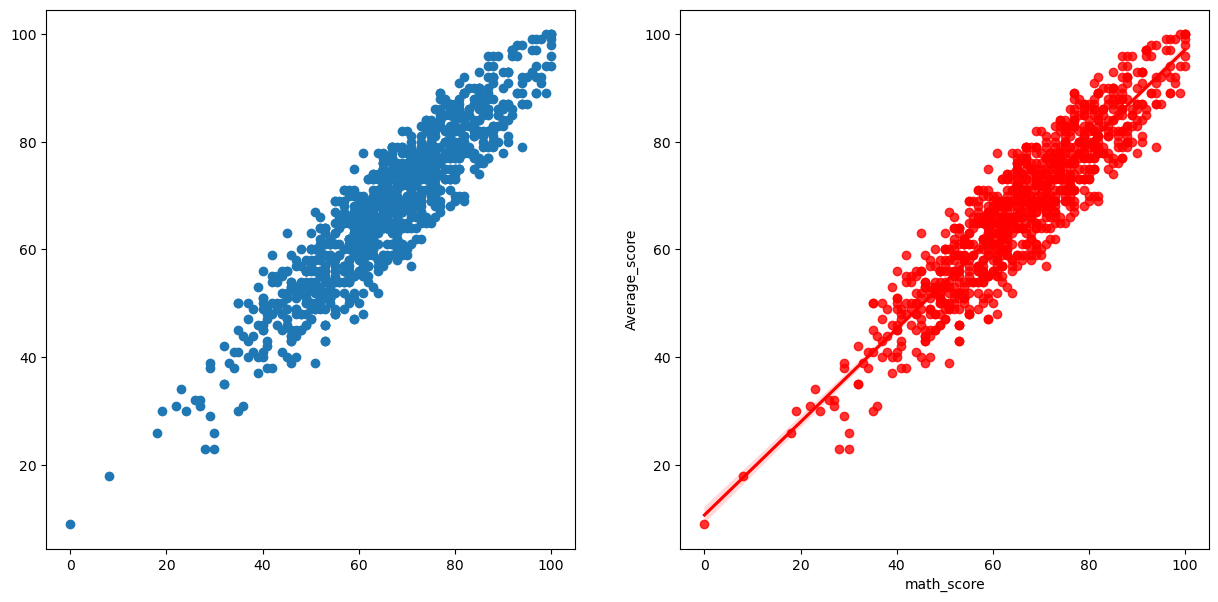

In [8]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(x=df['math_score'],y=df['Average_score'])
plt.subplot(1,2,2)
sns.regplot(x=df['math_score'],y=df['Average_score'],color='red')
plt.show()


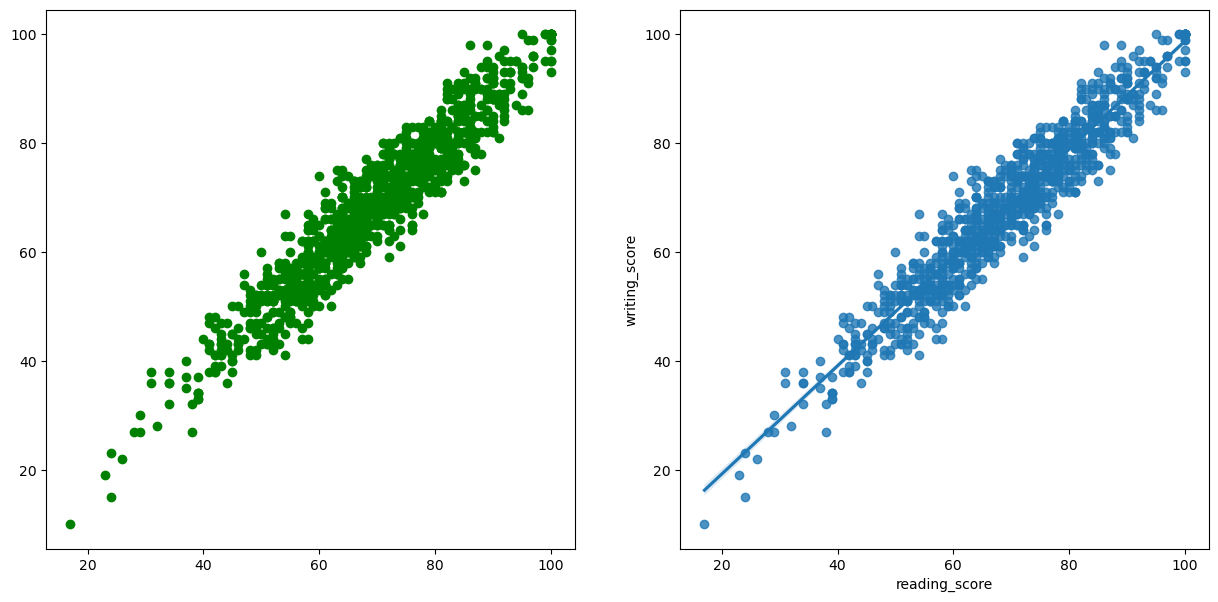

In [9]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(x=df['reading_score'],y=df['writing_score'],color='green')
plt.subplot(1,2,2)
sns.regplot(x=df['reading_score'],y=df['writing_score'])
plt.show()


In [10]:
catagorical = x.select_dtypes(include='object').columns
numerical =  x.select_dtypes(exclude='object').columns

In [11]:
from sklearn.compose import ColumnTransformer
OneHotEnc=OneHotEncoder(drop='first')
numeric_scaler = StandardScaler()

preprocessor = ColumnTransformer(
   
    [
        ('catagoric_transformer',OneHotEnc,catagorical),
        ('numeric_transformer',numeric_scaler,numerical)

    ]
)

In [12]:
x =preprocessor.fit_transform(x)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [14]:
def predict_vil(true,predict):
    mse = mean_squared_error(true,predict)
    mae = mean_absolute_error(true,predict)
    rmsr= np.sqrt(mean_squared_error(true,predict))
    r2_sco = r2_score(true,predict)
    return r2_sco,mae,rmsr

In [15]:
models = {
    'LinearRegression':LinearRegression(),
    'lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'LogisticRegression':LogisticRegression(),
    'Decision Tree':DecisionTreeRegressor(),
    'KNeighbors':KNeighborsRegressor(),
    'AdaBoost':AdaBoostRegressor(),
    'RandomForest':RandomForestRegressor(),
    'GradientBoosting':GradientBoostingRegressor(),
    'CatBoost':CatBoostRegressor(verbose=0),
    'Xgboost':XGBRegressor()

}
r2=[]
model_list=[]

In [16]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)


    y_train_pred =model.predict(X_train)
    y_test_pred  =model.predict(X_test)

    train_r2_sco,train_mae,train_rmsr = predict_vil(y_train,y_train_pred) 
    test_r2_sco,tets_mae,tets_rmsr = predict_vil(y_test,y_test_pred)



    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Train Set Prediction')
    print('R2_score:{:.4f}'.format(train_r2_sco))
    print('Mean_absolute_error:{:.4f}'.format(train_mae))
    print('Root_Mean_squared_error:{:.4f}'.format(train_rmsr))

    print('Test Set Prediction')
    print('R2_score:{:.4f}'.format(test_r2_sco))
    print('Mean_absolute_error:{:.4f}'.format(tets_mae))
    print('Root_Mean_squared_error:{:.4f}'.format(tets_rmsr))

    r2.append(test_r2_sco)


    print('=='*40)
    print('\n')
    






LinearRegression
Train Set Prediction
R2_score:0.9996
Mean_absolute_error:0.2315
Root_Mean_squared_error:0.2706
Test Set Prediction
R2_score:0.9997
Mean_absolute_error:0.2162
Root_Mean_squared_error:0.2638


lasso
Train Set Prediction
R2_score:0.9937
Mean_absolute_error:0.8836
Root_Mean_squared_error:1.1101
Test Set Prediction
R2_score:0.9935
Mean_absolute_error:0.9334
Root_Mean_squared_error:1.2069


Ridge
Train Set Prediction
R2_score:0.9996
Mean_absolute_error:0.2318
Root_Mean_squared_error:0.2707
Test Set Prediction
R2_score:0.9997
Mean_absolute_error:0.2172
Root_Mean_squared_error:0.2647


Elasticnet
Train Set Prediction
R2_score:0.9623
Mean_absolute_error:2.1677
Root_Mean_squared_error:2.7107
Test Set Prediction
R2_score:0.9612
Mean_absolute_error:2.2960
Root_Mean_squared_error:2.9480


LogisticRegression
Train Set Prediction
R2_score:0.9061
Mean_absolute_error:2.8360
Root_Mean_squared_error:4.2766
Test Set Prediction
R2_score:0.8610
Mean_absolute_error:4.0640
Root_Mean_squared_e

In [17]:
pd.DataFrame(list(zip(model_list,r2)),columns=['model_name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,model_name,R2_score
0,LinearRegression,0.999690
2,Ridge,0.999687
9,GradientBoosting,0.995576
10,CatBoost,0.995119
11,Xgboost,0.994187
8,RandomForest,0.993505
1,lasso,0.993501
5,Decision Tree,0.985332
7,AdaBoost,0.976074
6,KNeighbors,0.965935


In [18]:
model_lin = LinearRegression(fit_intercept=True)
model_lin =model_lin.fit(X_train,y_train)
y_pred = model_lin.predict(X_test)
r2_ss= r2_score(y_test,y_pred)
print('R2_score:{:.4f}'.format(r2_ss))

R2_score:0.9997


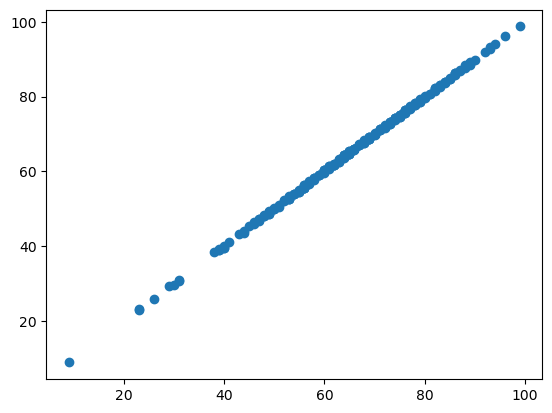

In [19]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='Average_score'>

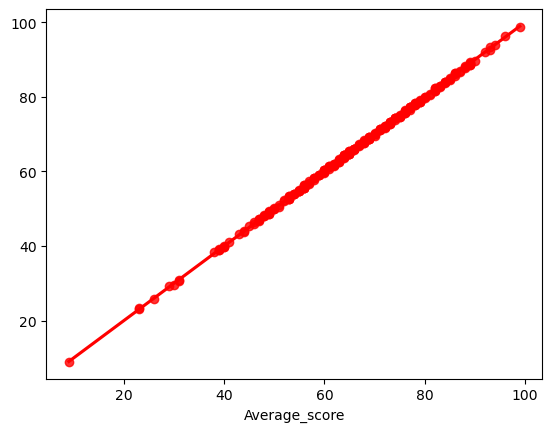

In [20]:
sns.regplot(x=y_test,y=y_pred,color='red')

In [21]:
new_df=pd.DataFrame({'Actual_value':y_test,'predict_value':y_pred,'Difference':y_test - y_pred})

In [22]:
new_df

,Actual_value,predict_value,Difference
521,87.0,87.013539,-0.013539
737,64.0,63.984505,0.015495
740,75.0,75.045211,-0.045211
660,75.0,74.569345,0.430655
411,82.0,81.580664,0.419336
...,...,...,...
109,69.0,68.660208,0.339792
430,63.0,62.958407,0.041593
77,80.0,79.662868,0.337132
84,38.0,38.395346,-0.395346


In [26]:
df.to_csv('data\ new_stud.csv')